In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/winequality-white.csv', delimiter = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df_copy = df.copy()
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Preprocessing

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


<BarContainer object of 7 artists>

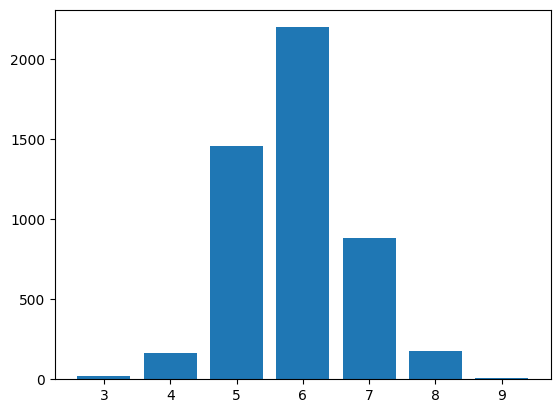

In [ ]:
import matplotlib.pyplot as plt

quality_counts = df['quality'].value_counts()
plt.bar(quality_counts.index, quality_counts.values)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [ ]:
df_scaled.drop('quality', axis = 1, inplace = True)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [ ]:
df_scaled['quality'] = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('quality', axis = 1)
y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Filter Methods

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.1)
x_train_selected = selector.fit_transform(x_train)
selected_feature = selector.get_support(indices = True)
print(selected_feature)

[ 0  3  5  6 10]


In [ ]:
x_selected_feature = x_train.columns[selected_feature]
print(f"Selected features are: {x_selected_feature}")
x_removed_feature = x_train.columns[~selected_feature]
print(f"Removed features are: {x_removed_feature}")

Selected features are: Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')
Removed features are: Index(['alcohol', 'density', 'free sulfur dioxide', 'chlorides',
       'fixed acidity'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train_selected_df = x_train[x_selected_feature]
x_test_selected_df = x_test[x_selected_feature]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_selected_df, y_train)
y_pred_var = model.predict(x_test_selected_df)

accuracy_var = accuracy_score(y_test, y_pred_var)
print(f"Accuracy with Variance Threshold: {accuracy_var}")

Accuracy with Variance Threshold: 0.4846938775510204


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nVariance Threshold:")
print(classification_report(y_test, y_pred_var))


Variance Threshold:
              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00        25
           5       0.49      0.45      0.47       291
           6       0.48      0.73      0.58       432
           7       0.53      0.14      0.22       192
           8       0.00      0.00      0.00        35

    accuracy                           0.48       980
   macro avg       0.33      0.25      0.26       980
weighted avg       0.46      0.48      0.44       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df = pd.read_csv('/content/winequality-white.csv', delimiter = ';')
df_copy = df.copy()
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<Axes: >

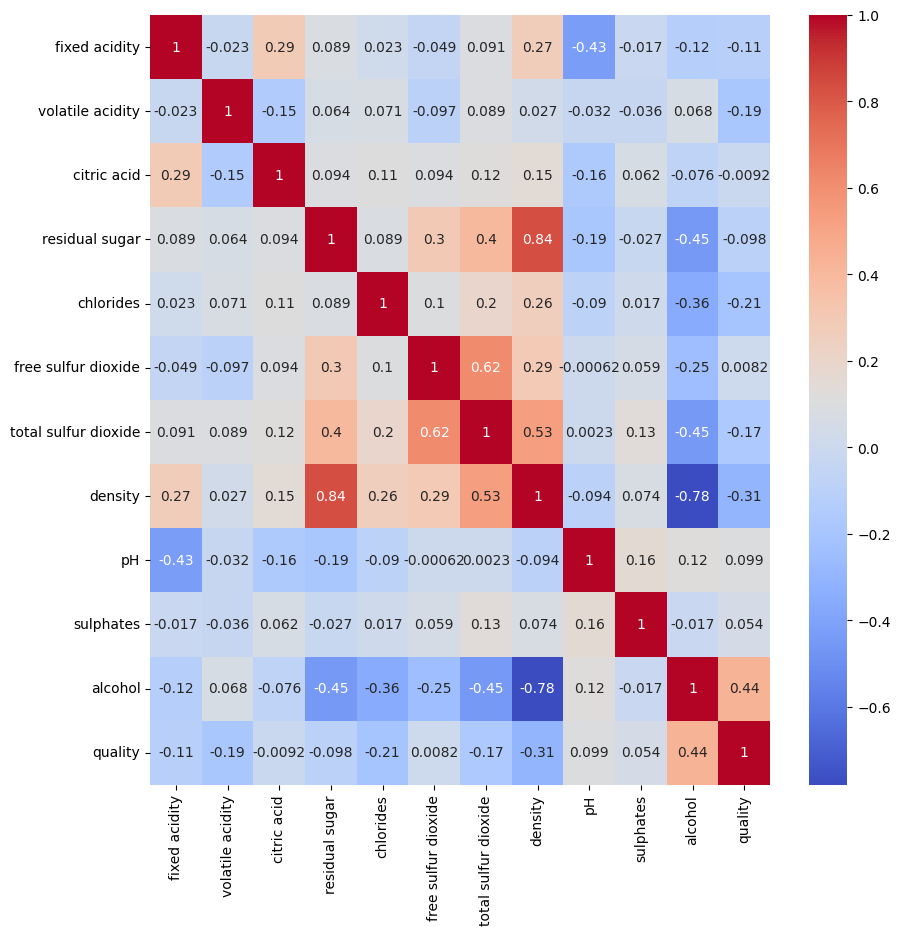

In [ ]:
import seaborn as sns

plt.figure(figsize = (10, 10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [ ]:
new_correlation = df.corr()['quality']
new_correlation

,quality
fixed acidity,-0.113663
volatile acidity,-0.194723
citric acid,-0.009209
residual sugar,-0.097577
chlorides,-0.209934
free sulfur dioxide,0.008158
total sulfur dioxide,-0.174737
density,-0.307123
pH,0.099427
sulphates,0.053678


<Axes: >

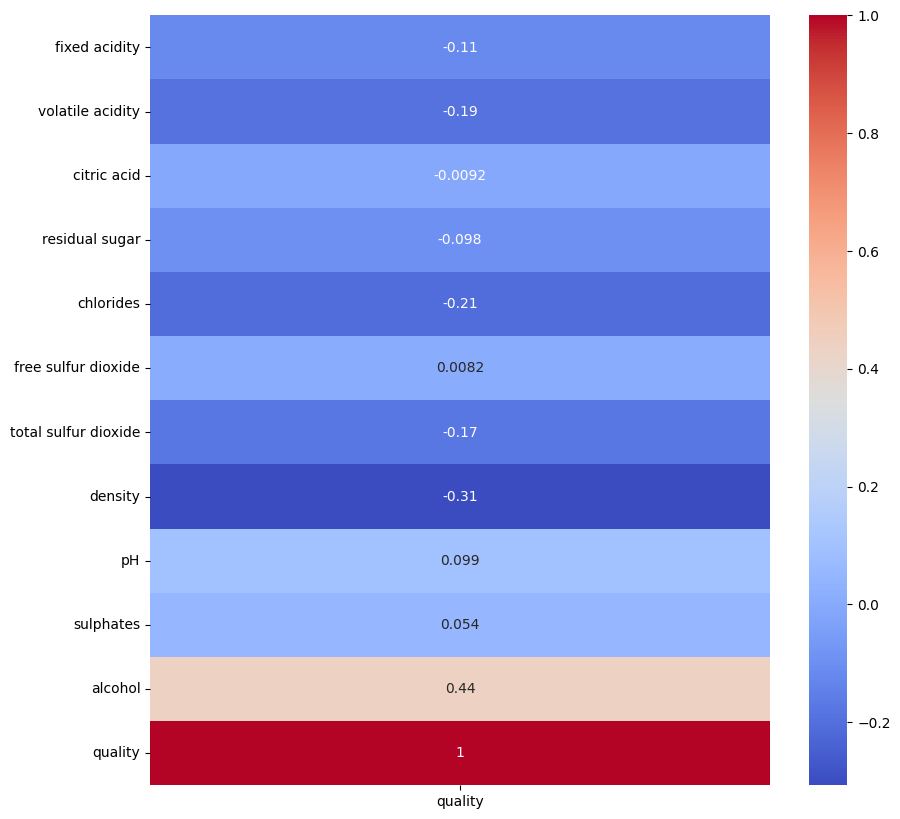

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(new_correlation.values.reshape(-1, 1), annot=True, cmap='coolwarm',
            xticklabels=['quality'], yticklabels=new_correlation.index)

In [ ]:
for feature in new_correlation.index:
  if abs(new_correlation[feature]) < 0.1:
    df.drop(feature, axis = 1, inplace = True)

In [ ]:
selected_features_corr = [col for col in df.columns if col != 'quality']
x_train_corr = x_train[selected_features_corr]
x_test_corr = x_test[selected_features_corr]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_corr, y_train)
y_pred_corr = model.predict(x_test_corr)

accuracy_corr = accuracy_score(y_test, y_pred_corr)
print(f"Accuracy with Correlation-based Feature Selection: {accuracy_corr}")

Accuracy with Correlation-based Feature Selection: 0.5020408163265306


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nCorrelation:")
print(classification_report(y_test, y_pred_corr))


Correlation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.54      0.47      0.50       291
           6       0.49      0.76      0.59       432
           7       0.53      0.13      0.21       192
           8       0.00      0.00      0.00        35

    accuracy                           0.50       980
   macro avg       0.26      0.23      0.22       980
weighted avg       0.48      0.50      0.45       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df = pd.read_csv('/content/winequality-white.csv', delimiter = ';')

In [ ]:
df_copy = df

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

while True:
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_copy.columns
    vif_data["VIF"] = [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])]

    if vif_data["VIF"].max() <= 5:
        break

    feature_to_drop = vif_data.loc[vif_data["VIF"].idxmax()].feature
    print(f"Dropping feature: {feature_to_drop} with VIF: {vif_data['VIF'].max()}")
    df_copy = df_copy.drop(columns=[feature_to_drop])

print("Final Features:")
print(df_copy.columns)

Dropping feature: density with VIF: 1063.7196499921656
Dropping feature: pH with VIF: 166.1799648726963
Dropping feature: alcohol with VIF: 91.57863061802145
Dropping feature: fixed acidity with VIF: 44.72460378920104
Dropping feature: total sulfur dioxide with VIF: 21.651288193007556
Dropping feature: quality with VIF: 20.363638387045366
Dropping feature: sulphates with VIF: 11.714177855614013
Dropping feature: citric acid with VIF: 6.150994969380813
Final Features:
Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide'],
      dtype='object')


In [ ]:
selected_features_vif = df_copy.columns.tolist()
if 'quality' in selected_features_vif:
    selected_features_vif.remove('quality')
x_train_vif = x_train[selected_features_vif]
x_test_vif = x_test[selected_features_vif]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_vif, y_train)
y_pred_vif = model.predict(x_test_vif)

accuracy_vif = accuracy_score(y_test, y_pred_vif)
print(f"Accuracy with VIF-based Feature Selection: {accuracy_vif}")

Accuracy with VIF-based Feature Selection: 0.45816326530612245


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nVIF:")
print(classification_report(y_test, y_pred_vif))


VIF:
              precision    recall  f1-score   support

           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00        25
           5       0.45      0.20      0.28       291
           6       0.46      0.90      0.61       432
           7       0.00      0.00      0.00       192
           8       0.00      0.00      0.00        35

    accuracy                           0.46       980
   macro avg       0.32      0.22      0.20       980
weighted avg       0.34      0.46      0.35       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df_copy = df

In [ ]:
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from sklearn.feature_selection import mutual_info_classif

x = df_copy.drop('quality', axis=1)
y = df_copy['quality']

mi_scores = mutual_info_classif(x, y)
mi_scores_series = pd.Series(mi_scores, index=x.columns)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

top_5_features = mi_scores_series.head(5).index.tolist()
print("\nTop 5 Features:")
print(top_5_features)


Top 5 Features:
['density', 'alcohol', 'residual sugar', 'total sulfur dioxide', 'chlorides']


In [ ]:
from sklearn.metrics import accuracy_score

x_train_mi = x_train[top_5_features]
x_test_mi = x_test[top_5_features]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_mi, y_train)
y_pred_mi = model.predict(x_test_mi)

accuracy_mi = accuracy_score(y_test, y_pred_mi)
print(f"Accuracy with Mutual Information-based Feature Selection: {accuracy_mi}")

Accuracy with Mutual Information-based Feature Selection: 0.49081632653061225


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nMutual Information:")
print(classification_report(y_test, y_pred_mi))


Mutual Information:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.50      0.50      0.50       291
           6       0.48      0.71      0.57       432
           7       0.54      0.15      0.24       192
           8       0.00      0.00      0.00        35

    accuracy                           0.49       980
   macro avg       0.25      0.23      0.22       980
weighted avg       0.47      0.49      0.45       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Wrapper method

In [ ]:
df_copy = df
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Forward Selection

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('quality', axis = 1)
y = df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train)
df_scaled = pd.DataFrame(df_scaled, columns=x_train.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.515119,-1.076233,0.227731,0.340419,-0.813688,0.534065,-0.641932,-0.447041,-0.328261,-0.702445,1.540371
1,-0.669188,-0.288777,0.895832,1.002071,-0.217212,0.773947,1.355106,0.903370,-0.061886,0.266074,-0.821712
2,-1.498203,0.400248,-0.022807,0.184737,-0.400743,-0.605377,-1.022320,-0.460280,0.404271,0.001933,0.481506
3,0.041396,-0.879369,0.144218,-0.924503,-0.446626,-0.125612,-0.879675,-0.304718,0.137896,0.442168,0.237153
4,0.988842,0.203384,-0.607396,2.432407,0.333383,0.054300,0.855846,1.883079,0.071302,0.089980,-0.088652


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, verbose=2, scoring='r2', cv=5)

In [ ]:
sfs.fit(x_train, y_train)


[2025-02-14 16:28:22] Features: 1/5 -- score: 0.18369814213573052
[2025-02-14 16:28:22] Features: 2/5 -- score: 0.2374828383931588
[2025-02-14 16:28:22] Features: 3/5 -- score: 0.2557497719014975
[2025-02-14 16:28:22] Features: 4/5 -- score: 0.26458626115154404
[2025-02-14 16:28:22] Features: 5/5 -- score: 0.26865804530528264

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(5, 5),
                          scoring='r2', verbose=2)

In [ ]:
selected_features = x_train.columns[list(sfs.k_feature_idx_)]
print(f"Selected features are: {selected_features}")

Selected features are: Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'alcohol'],
      dtype='object')


In [ ]:
x_train_forward = x_train[selected_features]
x_test_forward = x_test[selected_features]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_forward, y_train)
y_pred_forward = model.predict(x_test_forward)

accuracy_forward = accuracy_score(y_test, y_pred_forward)
print(f"Accuracy with Forward Selection: {accuracy_forward}")

Accuracy with Forward Selection: 0.5214285714285715


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nForward Selection:")
print(classification_report(y_test, y_pred_forward))


Forward Selection:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.58      0.53      0.55       291
           6       0.50      0.75      0.60       432
           7       0.49      0.18      0.27       192
           8       0.00      0.00      0.00        35

    accuracy                           0.52       980
   macro avg       0.26      0.24      0.24       980
weighted avg       0.49      0.52      0.48       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Backward Selection

In [ ]:
sfs = SequentialFeatureSelector(lr, k_features=5, forward=False, verbose=2, scoring='r2', cv=5)

In [ ]:
sfs.fit(x_train, y_train)


[2025-02-14 16:29:19] Features: 10/5 -- score: 0.2787081563809009
[2025-02-14 16:29:19] Features: 9/5 -- score: 0.27896105008992755
[2025-02-14 16:29:19] Features: 8/5 -- score: 0.27916180169123683
[2025-02-14 16:29:19] Features: 7/5 -- score: 0.27920606072476933
[2025-02-14 16:29:19] Features: 6/5 -- score: 0.2743287679869299
[2025-02-14 16:29:19] Features: 5/5 -- score: 0.268394074398948

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(5, 5), scoring='r2', verbose=2)

In [ ]:
selected_features = x_train.columns[list(sfs.k_feature_idx_)]
print(f"Selected features are: {selected_features}")

Selected features are: Index(['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


In [ ]:
df = pd.read_csv('/content/winequality-white.csv', delimiter = ';')
df_copy = df.copy()
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
x_train_backward = x_train[selected_features]
x_test_backward = x_test[selected_features]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_backward, y_train)
y_pred_backward = model.predict(x_test_backward)

accuracy_backward = accuracy_score(y_test, y_pred_backward)
print(f"Accuracy with Backward Selection: {accuracy_backward}")

Accuracy with Backward Selection: 0.513265306122449


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("\nBackward Selection:")
print(classification_report(y_test, y_pred_backward))


Backward Selection:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.58      0.48      0.53       291
           6       0.49      0.76      0.60       432
           7       0.49      0.18      0.27       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.26      0.24      0.23       980
weighted avg       0.49      0.51      0.47       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Embedded Method

In [ ]:
df = pd.read_csv('/content/winequality-white.csv', delimiter = ';')
df_copy = df.copy()
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
from sklearn.linear_model import Lasso

x = df_copy.drop('quality', axis=1)
y = df_copy['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
selected_features = x_train.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]

print("Selected Features:")
print(selected_features)
print("\nCoefficients:")
print(coefficients)

Selected Features:
Index(['volatile acidity', 'alcohol'], dtype='object')

Coefficients:
[-0.09923529  0.28902945]


In [ ]:
x_train_embedded = x_train[selected_features]
x_test_embedded = x_test[selected_features]

model = LogisticRegression(max_iter=1000)
model.fit(x_train_embedded, y_train)
y_pred_embedded = model.predict(x_test_embedded)

accuracy_embedded = accuracy_score(y_test, y_pred_embedded)
print(f"Accuracy with Embedded Method (Lasso): {accuracy_embedded}")

Accuracy with Embedded Method (Lasso): 0.4989795918367347


In [ ]:
print("\Embedded method:")
print(classification_report(y_test, y_pred_embedded))

\Embedded method:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.53      0.49      0.51       291
           6       0.49      0.74      0.59       432
           7       0.50      0.15      0.23       192
           8       0.00      0.00      0.00        35

    accuracy                           0.50       980
   macro avg       0.25      0.23      0.22       980
weighted avg       0.47      0.50      0.45       980



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Results

In [ ]:
num_features_variance_threshold = len(x_selected_feature)
num_features_correlation = len(selected_features_corr)
num_features_vif = len(selected_features_vif)
num_features_mutual_info = len(top_5_features)
num_features_forward_selection = len(selected_features)
num_features_backward_selection = len(selected_features)
num_features_embedded = len(selected_features)

print("Number of features selected by each method:")
print(f"Variance Threshold: {num_features_variance_threshold}")
print(f"Correlation: {num_features_correlation}")
print(f"VIF: {num_features_vif}")
print(f"Mutual Information: {num_features_mutual_info}")
print(f"Forward Selection: {num_features_forward_selection}")
print(f"Backward Selection: {num_features_backward_selection}")
print(f"Embedded Method (Lasso): {num_features_embedded}")

Number of features selected by each method:
Variance Threshold: 5
Correlation: 6
VIF: 4
Mutual Information: 5
Forward Selection: 2
Backward Selection: 2
Embedded Method (Lasso): 2


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, method_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nPerformance Metrics for {method_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_var, "Variance Threshold")
evaluate_model(y_test, y_pred_corr, "Correlation")
evaluate_model(y_test, y_pred_vif, "VIF")
evaluate_model(y_test, y_pred_mi, "Mutual Information")
evaluate_model(y_test, y_pred_forward, "Forward Selection")
evaluate_model(y_test, y_pred_backward, "Backward Selection")
evaluate_model(y_test, y_pred_embedded, "Embedded Method (Lasso)")


Performance Metrics for Variance Threshold:
Accuracy: 0.4847
Precision: 0.4624
Recall: 0.4847
F1-score: 0.4395
              precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00        25
           5       0.49      0.45      0.47       291
           6       0.48      0.73      0.58       432
           7       0.53      0.14      0.22       192
           8       0.00      0.00      0.00        35

    accuracy                           0.48       980
   macro avg       0.33      0.25      0.26       980
weighted avg       0.46      0.48      0.44       980


Performance Metrics for Correlation:
Accuracy: 0.5020
Precision: 0.4788
Recall: 0.5020
F1-score: 0.4526
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.54      0.47      0.50       291
           6       0.49

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m